# Tarea - Caminata aleatoria y simulación montecarlo

#### 1. Simulación del movimiento browniano

El movimiento browniano es el movimiento aleatorio que se observa en las partículas que se hallan en un medio fluido, como resultado de choques contra las moléculas de dicho fluido [(referencia)].

[(referencia)]: https://es.wikipedia.org/wiki/Movimiento_browniano

Para simular el movimiento, en lugar de usar las ecuaciones integro-diferenciales que describe Einstein, use una caminta aleatoria para los tres ejes $x$, $y$, $z$ de la siguiente forma
$$
W_i=W_{i-1}+X_i\sqrt{\Delta t}
$$
donde, $\Delta t$ es un intervalo de tiempo y 
$$
X_i=\left\{\begin{array}{l}
1\\
-1
\end{array}\right.,
$$
se escoge de forma aleatoria con la misma probabilidad.

Simule $10$ segundos con un $\Delta t=0.001$ y represéntelo en un gráfico 3D (Puede ver el archivo de Ejemplo 3D).

In [2]:
import numpy as np
import random as rand
import matplotlib.pyplot as plt
%matplotlib inline


#### 2. Apuesta arriesgada

Un jugador, con 20 pesos de capital inicial, decide apostar a un volado (con una moneda perfectamente nivelada) la mitad de su capital si éste es mayor o igual a 6 pesos, de lo contrario, solo 2. Esto es, el capital $C_i$ en cada volado $V_i$ se describe como
$$
C_{i+1}=C_i+V_iA_i
$$
donde la apuesta es 
$$
A_i=\left\{\begin{array}{l}
C_i/2,\quad \mbox{si }C_i\geq 6\\
2,\quad \mbox{de lo contrario.}
\end{array}\right.
$$

1. Grafique la evolución del capital hasta quedar en cero.
2. Determine el número de volados promedio para quedar en quiebra usando la simulación montecarlo para 10,000 apostadores.
3. Muestre un histograma del número de volados.

In [98]:
def volado():
    moneda=["aguila","sello"]
    return rand.choice(moneda) #Definimos el Evento del Volado

In [99]:
def juego(): #Definimos el resultado del Volado
    volado()
    if volado()=="aguila": #Suponemos que si cae en Águila, el jugador gana. Si no, pierde.
        GANASTE=True 
    else:
        GANASTE=False
    return GANASTE
juego()

False

In [100]:
def apuesta(C0):
    C=[C0]
    while C[-1]>0:
        ganaste=juego()
        if (C[-1]/2)>=6:
            if ganaste :
                C.append(C[-1]+(C[-1]/2))
            else:
                C.append(C[-1]-(C[-1]/2))
        else:
            if ganaste :
                C.append(C[-1]+2)
            else:
                C.append(C[-1]-2)
    return C


In [101]:
apuesta(20)

[20, 10.0, 12.0, 6.0, 4.0, 2.0, 0.0]

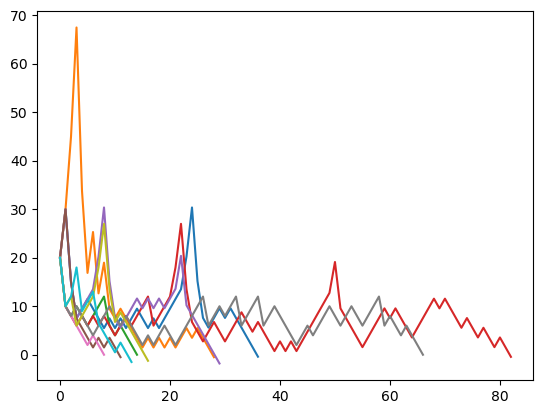

In [102]:
plt.figure()

for i in range(10):
    C=apuesta(20)
    plt.plot(C)

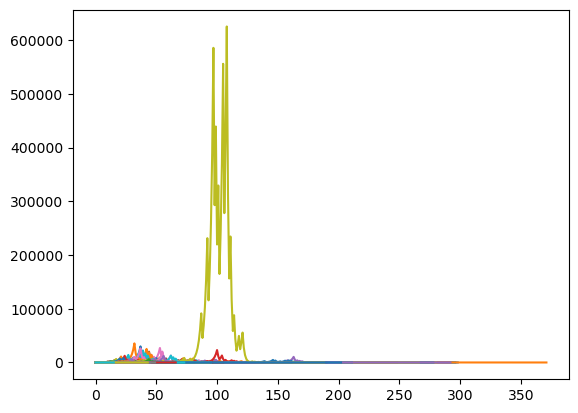

In [103]:
plt.figure()

for i in range(10000):
    C=apuesta(20)
    plt.plot(C)

In [104]:
def apuesta2(C0):
    C=[C0]
    while C[-1]>0:
        ganaste=juego()
        if (C[-1]/2)>=6:
            if ganaste :
                C.append(C[-1]+(C[-1]/2))
            else:
                C.append(C[-1]-(C[-1]/2))
        else:
            if ganaste :
                C.append(C[-1]+2)
            else:
                C.append(C[-1]-2)
    return C[-1]

In [105]:
apuesta2(20)

-1.5927734375

In [106]:
capital_final=[]
for i in range(10000):
    capital_final.append(apuesta2(20))

In [107]:
np.mean(capital_final)

-0.9226772823756372

(array([1215., 1005.,  863., 1158.,  904.,  495.,  505., 1022.,  332.,
        2501.]),
 array([-1.99887085, -1.79898376, -1.59909668, -1.39920959, -1.19932251,
        -0.99943542, -0.79954834, -0.59966125, -0.39977417, -0.19988708,
         0.        ]),
 <BarContainer object of 10 artists>)

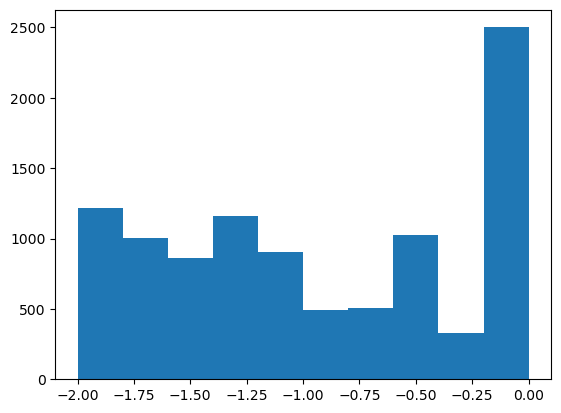

In [108]:
plt.figure()
plt.hist(capital_final)